In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve


In [3]:
np.random.seed(42)
n_samples = 1000


In [4]:
# Features:
email_length = np.random.randint(50, 1000, n_samples)  # Random email lengths
num_special_chars = np.random.randint(0, 50, n_samples)  # Special characters count
contains_spam_words = np.random.choice([0, 1], n_samples, p=[0.7, 0.3])  # 30% spam keywords

In [5]:
spam_labels = np.random.choice([0, 1], n_samples, p=[0.6, 0.4])

In [6]:
# Create DataFrame
df = pd.DataFrame({
    'Email_Length': email_length,
    'Num_Special_Chars': num_special_chars,
    'Contains_Spam_Words': contains_spam_words,
    'Spam_Label': spam_labels
})

In [7]:
X = df[['Email_Length','Num_Special_Chars','Contains_Spam_Words']]
y =df['Spam_Label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
##Train A logistic Regresiom 
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
#Make Prediction
y_pred = model.predict(X_test)

In [13]:
# 5️⃣ Calculate Precision, Recall & F1-Score
precision = precision_score(y_test, y_pred,zero_division=1)
recall = recall_score(y_test, y_pred,zero_division=1)
f1 = f1_score(y_test, y_pred,zero_division=1)

In [14]:
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 1.00
Recall: 0.00
F1-Score: 0.00


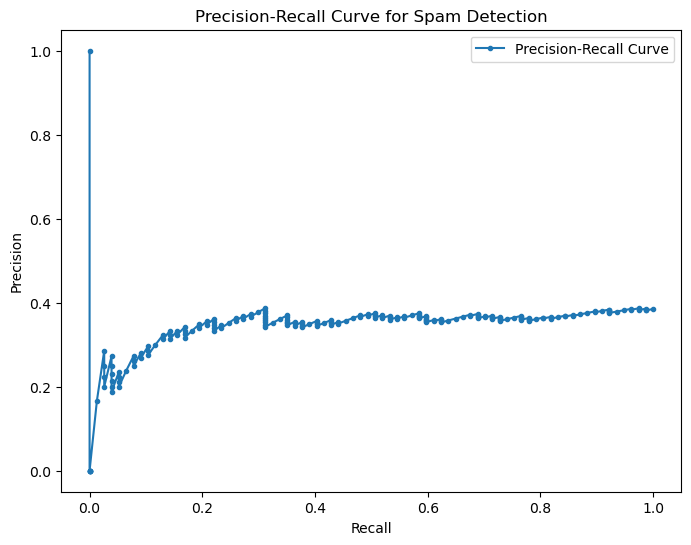

In [15]:
y_scores = model.decision_function(X_test)  # Get model scores
precisions, recalls, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Spam Detection')
plt.legend()
plt.show()
